# Defining the Question

### a) Specifying the Question

Predict if water is safe for Human consumption.

### b) Defining the Metric for Success

This project will be considered successful if we are able to create a prediction model with an accuracy scorer of 80% or higher and use it to make predictions.

### c) Understanding the context 

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

The water_potability.csv file contains water quality metrics for 3276 different water bodies.

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

The data source can be found here https://www.kaggle.com/adityakadiwal/water-potability 


### d) Recording the Experimental Design

1. Defining the Question
2. Reading the Data.
3. Checking the Data.
4. Data Cleaning
5. Performing EDA
6. Building Prediction Model
7. Evaluation of the solution
8. Challenging the solution 
9. Conclusion

### e) Data Relevance

This will be discussed after the analysis and prediction has been completed

# Data Preparation

### Importing our Libraries

In [1]:
# installing the necessary libraries not in google colab
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     / 34.6 MB 63.8 MB/s
     |████████████████████████████████| 10.1 MB 5.1 MB/s 
     |████████████████████████████████| 636 kB 62.0 MB/s 
     |████████████████████████████████| 102 kB 70.0 MB/s 
     |████████████████████████████████| 675 kB 58.2 MB/s 
     |████████████████████████████████| 3.1 MB 74.4 MB/s 
     |████████████████████████████████| 62 kB 890 kB/s 
     |████████████████████████████████| 812 kB 76.3 MB/s 
     |████████████████████████████████| 28.5 MB 36 kB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248524 sha256=337c39763aeeeef7fb49c7d1fb3af1755cb2575dbcd2df546ff76101b1bfbdd3
  Stored in directory: /tmp/pip-ephem-wheel-cache-kcnasg2t/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=0a7e098ebef6c06ea223f092b9768d15bc45b44cd94385194b21db1385187d82
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14

In [2]:
# Let us first import all the libraries we will need for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import re
from matplotlib import pyplot as plt
%matplotlib inline
import pandas_profiling
from pandas_profiling import ProfileReport
from scipy import stats
from scipy.stats import norm
import math
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# let us set the warnings that may appear in our analysis off

import warnings
warnings.filterwarnings('ignore') 

# subsequently let us set the pandas warning for chained assignments off
pd.options.mode.chained_assignment = None  # default='warn'

### Loading and Previewing our Dataset

In [4]:
# Loading the Dataset from the source i.e. csv
df_train = pd.read_csv('/content/drive/MyDrive/DS competitions/water_potability.csv')
df_train.head()

ph    Hardness        Solids  ...  Trihalomethanes  Turbidity  Potability
0       NaN  204.890455  20791.318981  ...        86.990970   2.963135           0
1  3.716080  129.422921  18630.057858  ...        56.329076   4.500656           0
2  8.099124  224.236259  19909.541732  ...        66.420093   3.055934           0
3  8.316766  214.373394  22018.417441  ...       100.341674   4.628771           0
4  9.092223  181.101509  17978.986339  ...        31.997993   4.075075           0

[5 rows x 10 columns]

## Checking the Data

In [6]:
# Determining the no. of records in our train dataset
#
print('This train dataset has ' + str(df_train.shape[0]) + ' rows, and ' + str(df_train.shape[1]) + ' columns')

This train dataset has 3276 rows, and 10 columns


In [7]:
# Checking whether each column has an appropriate datatype
#
df_train.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [8]:
# checking the dataset information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
# let us see the columns in our dataframe
print("***** Column names present in dataset *****")
df_train.columns

***** Column names present in dataset *****


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [10]:
# Checking the entire profile of the dataframe
profile = ProfileReport(df_train, title="Water Quality Profile Report", html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# let us save our profile report
profile.to_file(output_file="Titanic_Profile_Report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# let us see the unique values of all our columns
# so that we can separate out the category and numeric features
for i in df_train.columns:
    print("Number of unique {} are : {}".format(i,len(df_train[i].unique())))

Number of unique ph are : 2786
Number of unique Hardness are : 3276
Number of unique Solids are : 3276
Number of unique Chloramines are : 3276
Number of unique Sulfate are : 2496
Number of unique Conductivity are : 3276
Number of unique Organic_carbon are : 3276
Number of unique Trihalomethanes are : 3115
Number of unique Turbidity are : 3276
Number of unique Potability are : 2


# Data Cleaning-Train Dataset

In [12]:
# let us make a copy of our dataset to clean and do modelling on
df_copy = df_train.copy(deep = True)

In [13]:
# For consistency, the column names should be uniform
# Let us change all column names to lower case
#
df_copy.columns = df_copy.columns.str.lower()
# Previewing the columns to confirm whether the changes have taken effect
#
df_copy.columns

Index(['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity', 'potability'],
      dtype='object')

In [14]:
# From our profile report, we can see that we have no duplicated rows
# But let us check 
df_copy.duplicated().sum()

0

In [16]:
# Let Us Drop the columns that do contribute to 
# whether a passenger survives or not 

#df_copy.drop(['id'], axis=1, inplace=True)

# let us confirm that we have dropped the unnecessary columns
#df_copy.head()

In [17]:
# let us check for missing values in our dataframe
null_list = list(df_copy.columns.values)

for n in null_list:
    print (n,": ",sum(pd.isnull(df_copy[n])))
#We have missing values in the credit product column

ph :  491
hardness :  0
solids :  0
chloramines :  0
sulfate :  781
conductivity :  0
organic_carbon :  0
trihalomethanes :  162
turbidity :  0
potability :  0


In [18]:
# let us see how much information we lose by dropping the null values
df_clean = df_copy.dropna()
print('Shape of dataframe with no missing values: ', df_clean.shape)
print('Shape of dataframe with missing values: ', df_copy.shape)
# by dropping our null values we have dropped an insignificant number rows of our dataframes

Shape of dataframe with no missing values:  (2011, 10)
Shape of dataframe with missing values:  (3276, 10)


# Exploratory Data Analysis

In [20]:
# let us see some info on our dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   hardness         2011 non-null   float64
 2   solids           2011 non-null   float64
 3   chloramines      2011 non-null   float64
 4   sulfate          2011 non-null   float64
 5   conductivity     2011 non-null   float64
 6   organic_carbon   2011 non-null   float64
 7   trihalomethanes  2011 non-null   float64
 8   turbidity        2011 non-null   float64
 9   potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [21]:
# let us see some summary statistics of the dataset
df_clean.describe()

ph     hardness  ...    turbidity   potability
count  2011.000000  2011.000000  ...  2011.000000  2011.000000
mean      7.085990   195.968072  ...     3.969729     0.403282
std       1.573337    32.635085  ...     0.780346     0.490678
min       0.227499    73.492234  ...     1.450000     0.000000
25%       6.089723   176.744938  ...     3.442915     0.000000
50%       7.027297   197.191839  ...     3.968177     0.000000
75%       8.052969   216.441070  ...     4.514175     1.000000
max      14.000000   317.338124  ...     6.494749     1.000000

[8 rows x 10 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ddc627a50>,
      dtype=object)

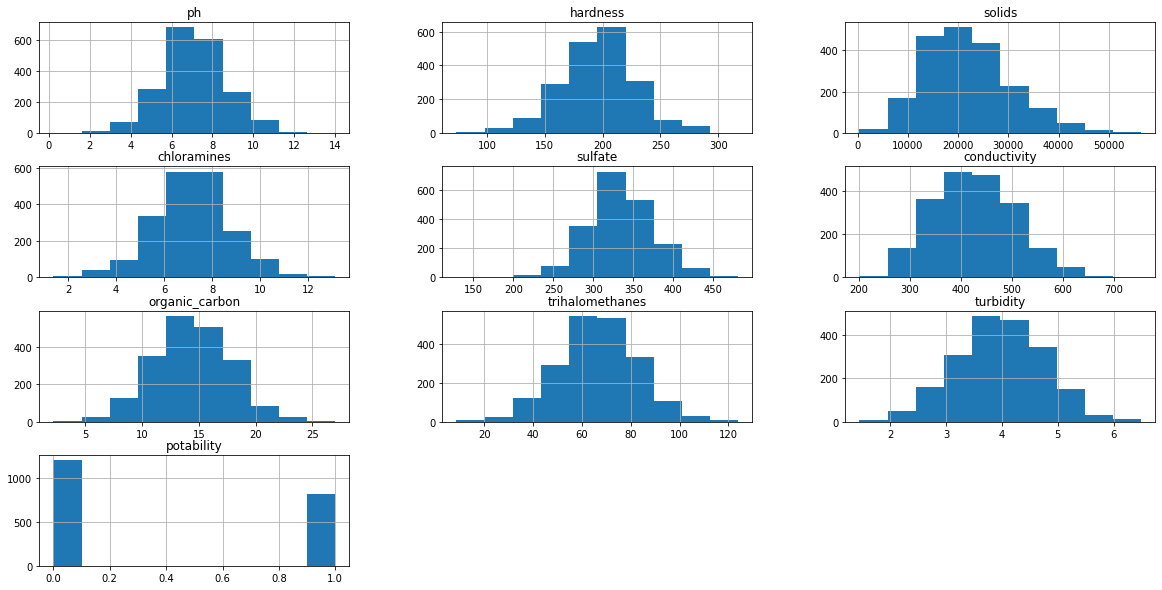

In [22]:
# let us plot histograms to visualize patterns in the data
df_clean.hist(figsize = (20,10))

Text(0.5, 1.0, 'Checking for outliers using boxplots')

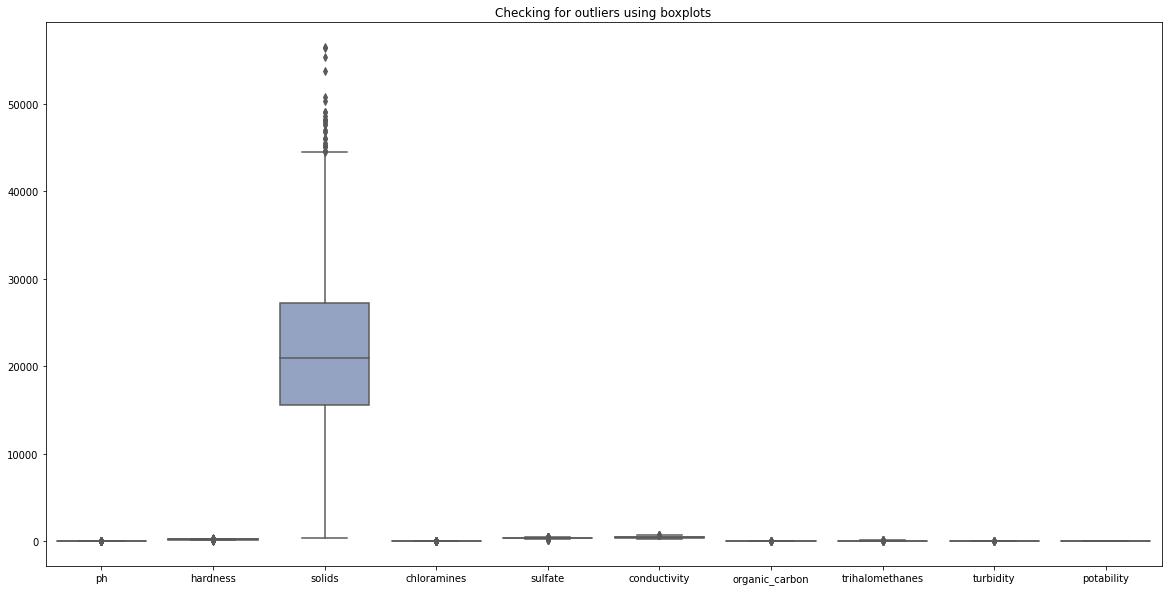

In [23]:
# Boxplots to Visualize outliers of our numerical columns 
plt.figure(figsize = (20,10))
ax = sns.boxplot(data=df_clean, orient="v", palette="Set2")
plt.title('Checking for outliers using boxplots')
# The boxplots below indicate the outliers in each of the numerical columns

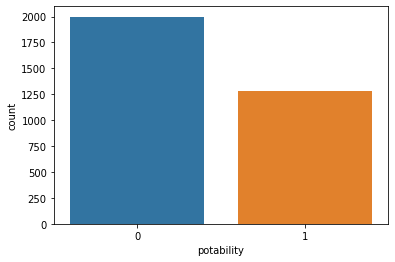

In [38]:
# let us see how balanced our data is

sns.countplot(x="potability", data = df_copy)

# we can see that there is not much imbalance in our dataset

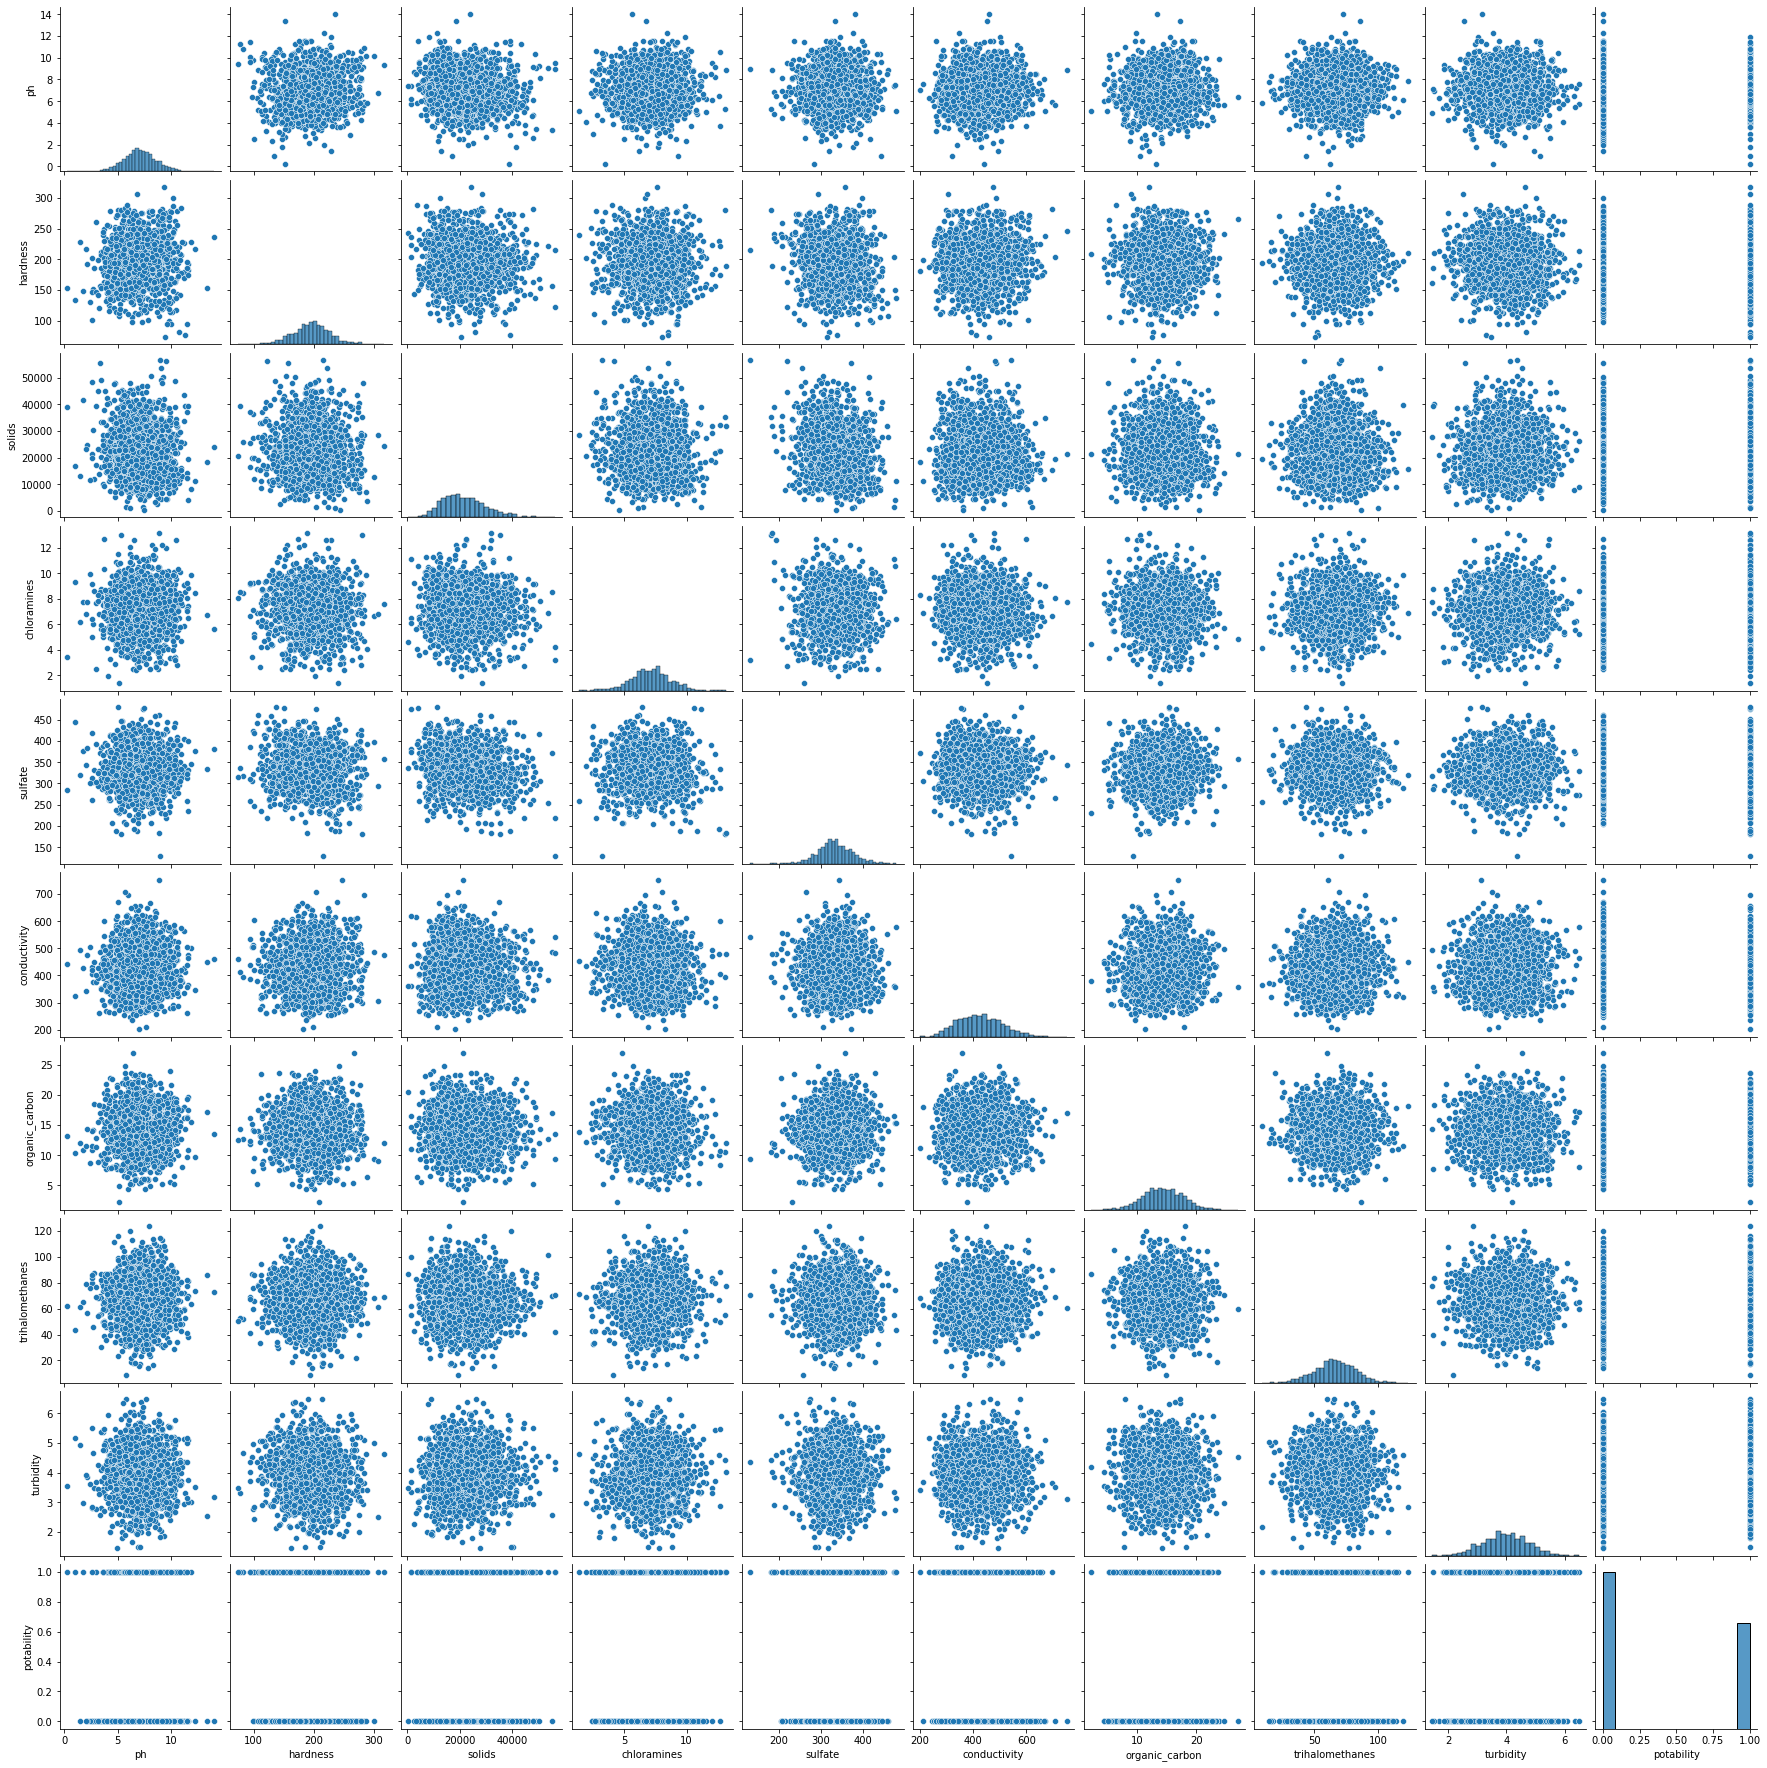

In [26]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df_clean)
plt.show()

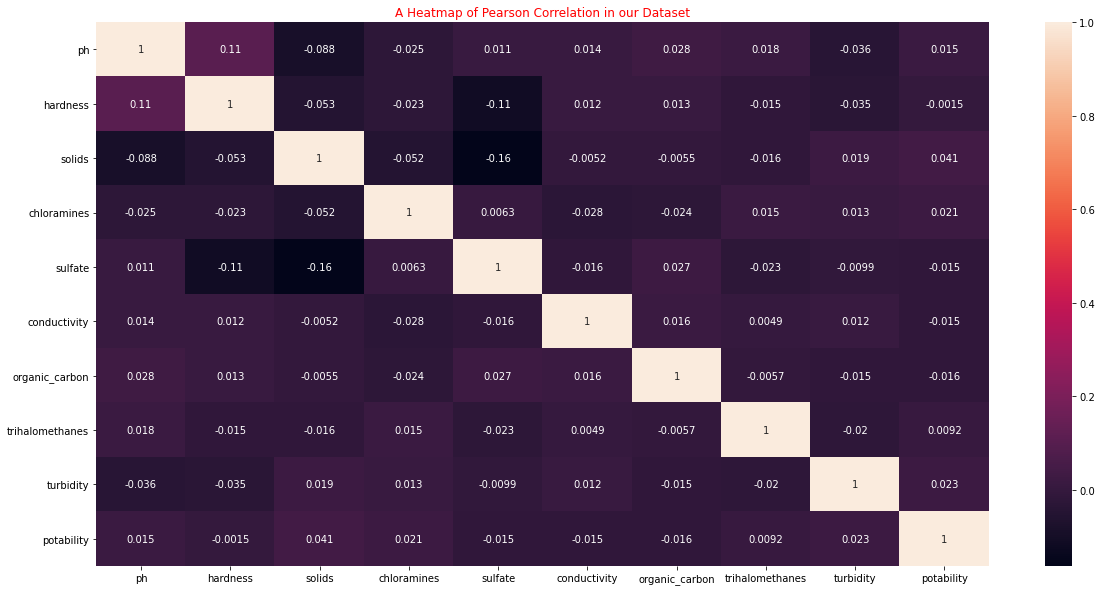

In [28]:
# Calculating the pearson coefficient correlation
a = df_clean.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, annot=True)
plt.title('A Heatmap of Pearson Correlation in our Dataset', color='red')
plt.show()
# From this we can see there is a correlation between t3 and tt4.

# Data Preprocessing

In [29]:
#multicollinearity
#multicollinearity test
# Let's display the correlations between the variables
correlations = df_clean.corr()

correlations

ph  hardness  ...  turbidity  potability
ph               1.000000  0.108948  ...  -0.035849    0.014530
hardness         0.108948  1.000000  ...  -0.034831   -0.001505
solids          -0.087615 -0.053269  ...   0.019409    0.040674
chloramines     -0.024768 -0.022685  ...   0.013137    0.020784
sulfate          0.010524 -0.108521  ...  -0.009934   -0.015303
conductivity     0.014128  0.011731  ...   0.012495   -0.015496
organic_carbon   0.028375  0.013224  ...  -0.015428   -0.015567
trihalomethanes  0.018278 -0.015400  ...  -0.020497    0.009244
turbidity       -0.035849 -0.034831  ...   1.000000    0.022682
potability       0.014530 -0.001505  ...   0.022682    1.000000

[10 rows x 10 columns]

In [30]:
#VIF test
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

ph  hardness  ...  turbidity  potability
ph               1.022281 -0.106033  ...   0.030719   -0.020220
hardness        -0.106033  1.030857  ...   0.032107    0.000583
solids           0.083593  0.066664  ...  -0.012742   -0.041913
chloramines      0.026630  0.022150  ...  -0.012358   -0.022356
sulfate         -0.008774  0.124742  ...   0.010694    0.008365
conductivity    -0.012351 -0.007909  ...  -0.014262    0.015215
organic_carbon  -0.026033 -0.012317  ...   0.013538    0.014566
trihalomethanes -0.018883  0.022060  ...   0.021103   -0.009477
turbidity        0.030719  0.032107  ...   1.004064   -0.022439
potability      -0.020220  0.000583  ...  -0.022439    1.003651

[10 rows x 10 columns]

# Modeling Time

since our data is highly imbalanced we will use resampling techniques to balance the data.

The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfishing.

In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

##### Compare Algorithms without resampling

In [ ]:
# Installing catboost
!pip install catboost

In [33]:
from matplotlib import pyplot
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [34]:
# let us make a copy of our dataset to clean and do modelling on
final_train = df_clean.copy(deep = True)

In [37]:
# compare algorithms
# Declaring our X and y variables
X = final_train.drop('potability', axis=1)
y = final_train.potability

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.484922 (0.035884)
LDA: 0.485005 (0.035982)
KNN: 0.638457 (0.050343)
DTC: 0.575216 (0.036315)
RF: 0.687650 (0.052249)
GBC: 0.656466 (0.038361)
NB: 0.596080 (0.045650)


##### Compare Algorithms - Oversampling

In [39]:
# compare algorithms
# Declaring our X and y variables
X = final_train.drop('potability', axis=1)
y = final_train.potability

# oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# #scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.488946 (0.034373)
LDA: 0.485884 (0.034457)
KNN: 0.574674 (0.039423)
DTC: 0.679167 (0.024024)
RF: 0.821521 (0.024365)
GBC: 0.717432 (0.039010)
NB: 0.613563 (0.035894)


##### Compare Algorithms - Undersampling

In [41]:
# compare algorithms
# Declaring our X and y variables
X = final_train.drop('potability', axis=1)
y = final_train.potability

# undersampling
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.513174 (0.044964)
LDA: 0.509776 (0.041909)
KNN: 0.516826 (0.065202)
CART: 0.581297 (0.040046)
RF: 0.690099 (0.043266)
GBC: 0.647670 (0.023036)
NB: 0.599462 (0.031840)


In [ ]:
# oversampling works best with Random Forest algorithm

### Random Forest

In [43]:
# Declaring our X and y variables
X = final_train.drop('potability', axis=1)
y = final_train.potability

# oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

rfc = RandomForestClassifier(random_state=101)
# Train a model

rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)



# printing the accuracy using accuracy score
print(roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = rfc.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The area under curve score for our train dataset is: {roc_auc_score(y_train, y_pred_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_train)}')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

0.7611111111111111
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       360
           1       0.78      0.73      0.75       360

    accuracy                           0.76       720
   macro avg       0.76      0.76      0.76       720
weighted avg       0.76      0.76      0.76       720



The area under curve score for our train dataset is: 1.0
The f1 score for our train dataset is 1.0
[[840   0]
 [  0 840]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       840
           1       1.00      1.00      1.00       840

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680



In [ ]:
# our model is overfitting, let us crossvalidate it

In [45]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

# Declaring our X and y variables
X = final_train.drop('potability', axis=1)
y = final_train.potability

# oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

rfc = RandomForestClassifier(random_state=101)
# Train a model

rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(rfc, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Auc: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Auc: 0.861 (0.023)


# Testing